## Simulation of AIMD (Additive Increase Multiplicative Decrease) Algorithm
This notebook presents a Python implementation designed to simulate the behavior of the AIMD (Additive Increase Multiplicative Decrease) algorithm, which is widely used in network congestion control. The AIMD algorithm dynamically adjusts the congestion window size (cwnd) to optimize network throughput while minimizing packet loss due to network congestion.

The core concept revolves around two main phases:

Additive Increase: For each round-trip time (RTT), the congestion window size is incrementally increased by a predefined amount to probe the network's capacity.


Multiplicative Decrease: Upon detection of network congestion (typically signaled by packet loss), the size of the congestion window is multiplicatively decreased, significantly reducing the sending rate.


The parameters of the simulation include the number of users, the initial congestion window size, the maximum allowed sum of all users' congestion windows (to simulate network capacity), and functions defining the additive increase and multiplicative decrease behaviors.

The simulation runs over a specified number of RTTs, tracking the evolution of each user's congestion window size. This data is then visualized to illustrate how the congestion window sizes change over time, providing insights into the dynamics of network congestion control through the AIMD algorithm.

Below are the helper functions defined to demonstrate the changes in network behaviour following different network conditions, such as a variable number of users as well as the usage of different functions in the increase and decrease of the window size.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AIMD function that simulates the AIMD behavior for a single user.
def AIMD(user, cwnd, alpha, beta, total_cwnd, max_cwnd_sum, beta_bool):
    """
    Args:
        user: The index of the current user.
        cwnd: The current congestion window size for this user.
        alpha: A function or a constant value used for the additive increase.
        beta: A function or a constant value used for the multiplicative decrease.
        total_cwnd: The current total congestion window size across all users.
        max_cwnd_sum: The maximum allowed total congestion window size across all users.
        beta_bool: A boolean indicating whether the multiplicative decrease should be applied.

    Returns:
        The updated congestion window size after applying AIMD adjustments.
    """
    # Additive increase phase: increment the cwnd by a value determined by the alpha function or constant.
    cwnd += alpha(user, cwnd)

    # If the total cwnd exceeds the maximum allowed, apply multiplicative decrease.
    if beta_bool:
        cwnd *= beta(cwnd)  # Multiplicative decrease phase.
        cwnd = int(cwnd)  # Convert to integer to avoid fractional window sizes.
        cwnd = max(1, cwnd)  # Ensure cwnd does not fall below 1.

    return cwnd

# Define a function to visualize the evolution of congestion window sizes for all users.
def visualize_plot(cwnd_tracker, num_users, plot_title):
    """
    Args:
        cwnd_tracker: A 2D array tracking the congestion window sizes of all users over time.
        num_users: The number of users in the simulation.
        plot_title: The title for the plot.

    This function generates a plot showing the congestion window size for each user over time.
    """
    plt.figure(figsize=(10, 6))
    for user in range(num_users):
        plt.plot(cwnd_tracker[user], label=f'User {user + 1}')
    plt.xlabel('Round-Trip Time (RTT)')
    plt.ylabel('Congestion Window Size (cwnd)')
    plt.title(plot_title)
    plt.legend()
    plt.show()

# Define the main simulation function.
def simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title):
    """
    Args:
        max_RTTs: The maximum number of RTTs to simulate.
        num_users: The number of users in the simulation.
        max_cwnd_sum: The maximum allowed total congestion window size for all users.
        alpha_func: The function defining the additive increase behavior.
        beta_func: The function defining the multiplicative decrease behavior.
        plot_title: The title for the final visualization plot.

    This function runs the AIMD simulation for the specified number of RTTs and users,
    tracks the congestion window sizes, and visualizes the results.
    """
    total_cwnd = 0  # Initialize the total congestion window size.
    cwnd_tracker = np.zeros((num_users, max_RTTs))  # Initialize a tracker for congestion window sizes over time.
    for i, initial_cwnd_size in enumerate(initial_cwnd):
      cwnd_tracker[i, 0] = initial_cwnd_size
    for rtt in range(max_RTTs):
        cur = 0
        if total_cwnd > max_cwnd_sum:
          beta_bool = True
          print('Multiplicative Decrease at:', rtt)
        else:
          beta_bool = False

        for user in range(num_users):
            if rtt == 0:
              cwnd = cwnd_tracker[user, 0]
              print(f"Initial cwnd for user {user}: {cwnd}")
            else:
              cwnd = cwnd_tracker[user, rtt-1]
            cwnd = AIMD(user, cwnd, alpha_func, beta_func, total_cwnd, max_cwnd_sum, beta_bool)
            cwnd_tracker[user, rtt] = cwnd
            cur += cwnd  # Update total cwnd after each user's increase
        total_cwnd = cur
    print(cwnd_tracker)
    visualize_plot(cwnd_tracker, num_users, plot_title)

## Experiment 0: Traditional AIMD with alpha = 1, beta = 0.5

We run baseline AIMD using the default parameters of alpha = 1, beta = 0.5 following TCP Reno. This serves as the baseline behaviour for our AIMD algorithm.

Initial cwnd for user 0: 10.0
Initial cwnd for user 1: 90.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 27
Multiplicative Decrease at: 53
Multiplicative Decrease at: 79
Multiplicative Decrease at: 105
Multiplicative Decrease at: 131
Multiplicative Decrease at: 157
Multiplicative Decrease at: 183
[[11.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
  23. 24. 25. 26. 27. 28. 29. 30. 31. 16. 17. 18. 19. 20. 21. 22. 23. 24.
  25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 21.
  22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
  40. 41. 42. 43. 44. 45. 46. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.
  34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 24. 25. 26.
  27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44.
  45. 46. 47. 48. 49. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
  38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 25. 26. 27. 28. 29.
  30. 31. 32. 33. 34. 3

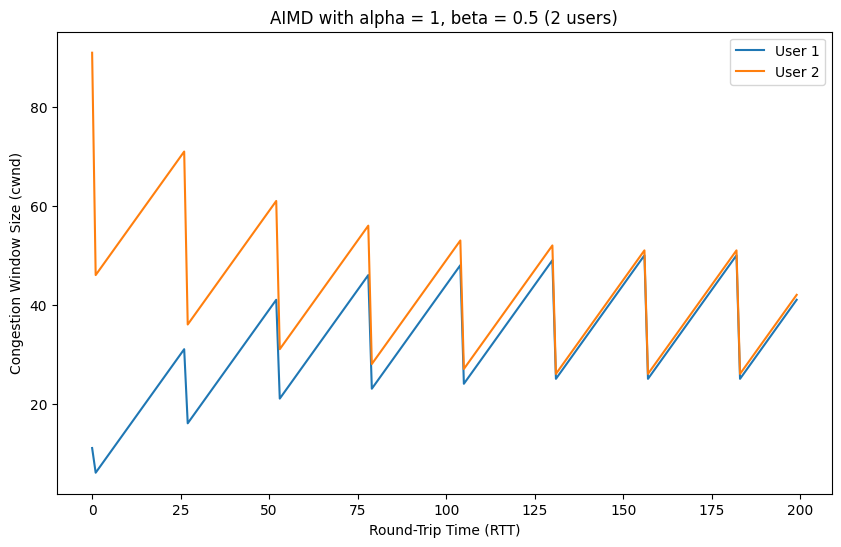

In [ ]:
plot_title = "AIMD with alpha = 1, beta = 0.5 (2 users)"

# Experiment setup
num_users = 2  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 100  # Define the maximum total sum of congestion window sizes across all users.
initial_cwnd = [10, 90] # Define the initial cwnd size for users.

# Define the alpha function, which determines the additive increase based on user priority.
def alpha_func(user, cwnd):
    """
    Args:
        user: The index of the current user.
        cwnd: The current congestion window size (not used in this function but included for consistency).

    Returns:
        The amount by which the user's cwnd should be increased in the additive increase phase.
    """
    return 1

# Define the beta function, which specifies the multiplicative decrease factor.
def beta_func(cwnd):
    """
    Args:
        cwnd: The current congestion window size.

    Returns:
        The factor by which the cwnd should be multiplied in the multiplicative decrease phase.
    """
    return 0.5  # A constant multiplicative decrease factor for all users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

We note that convergence occurs at around the 131st RTT in this instance between the two users with initial cwnd size of 10 and 90 respectively.

Initial cwnd for user 0: 22.0
Initial cwnd for user 1: 21.0
Initial cwnd for user 2: 50.0
Initial cwnd for user 3: 9.0
Initial cwnd for user 4: 47.0
Initial cwnd for user 5: 26.0
Initial cwnd for user 6: 12.0
Initial cwnd for user 7: 44.0
Initial cwnd for user 8: 36.0
Initial cwnd for user 9: 38.0
Initial cwnd for user 10: 13.0
Initial cwnd for user 11: 36.0
Initial cwnd for user 12: 47.0
Initial cwnd for user 13: 5.0
Initial cwnd for user 14: 26.0
Initial cwnd for user 15: 28.0
Initial cwnd for user 16: 16.0
Initial cwnd for user 17: 5.0
Initial cwnd for user 18: 36.0
Initial cwnd for user 19: 21.0
Multiplicative Decrease at: 24
Multiplicative Decrease at: 50
Multiplicative Decrease at: 76
Multiplicative Decrease at: 102
Multiplicative Decrease at: 128
Multiplicative Decrease at: 154
Multiplicative Decrease at: 180
[[23. 24. 25. ... 42. 43. 44.]
 [22. 23. 24. ... 42. 43. 44.]
 [51. 52. 53. ... 43. 44. 45.]
 ...
 [ 6.  7.  8. ... 42. 43. 44.]
 [37. 38. 39. ... 43. 44. 45.]
 [22. 23. 24

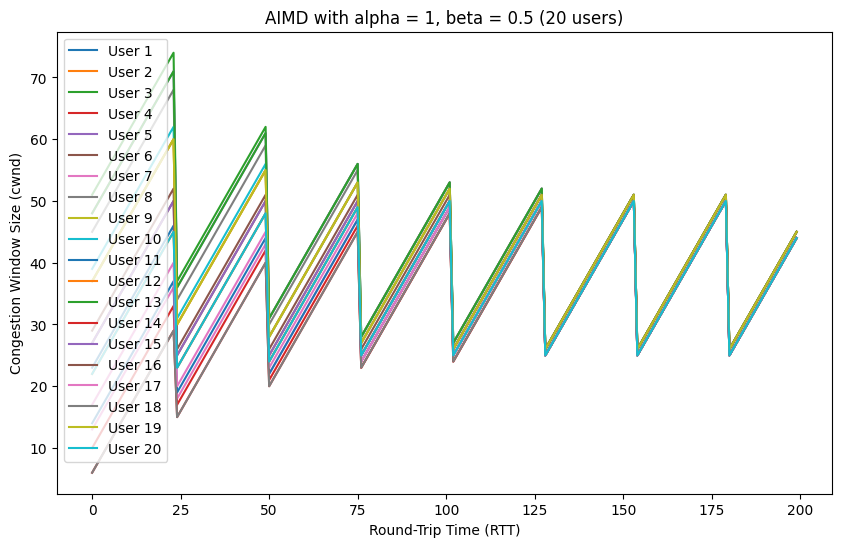

In [ ]:
plot_title = "AIMD with alpha = 1, beta = 0.5 (20 users)"

# Experiment setup
num_users = 20  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 1000  # Define the maximum total sum of congestion window sizes across all users.
# initial_cwnd = [10, 90] # Define the initial cwnd size for users.
initial_cwnd = np.random.rand(20)
initial_cwnd *= max_cwnd_sum // num_users
initial_cwnd = np.round(initial_cwnd)

# Define the alpha function, which determines the additive increase based on user priority.
def alpha_func(user, cwnd):
    """
    Args:
        user: The index of the current user.
        cwnd: The current congestion window size (not used in this function but included for consistency).

    Returns:
        The amount by which the user's cwnd should be increased in the additive increase phase.
    """
    return 1

# Define the beta function, which specifies the multiplicative decrease factor.
def beta_func(cwnd):
    """
    Args:
        cwnd: The current congestion window size.

    Returns:
        The factor by which the cwnd should be multiplied in the multiplicative decrease phase.
    """
    return 0.5  # A constant multiplicative decrease factor for all users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

## Experiment 1: AIMD with Logarithmic Increase

Logarithmic increase allows for a higher rate of increase of the cwnd size that tapers off as the cwnd size gets larger. This may allow the network to approach the maximum bandwidth capacity with a smaller cwnd size in the final few iterations of the increment phase, and hence could lower the packet loss compared to adoption of other TCP algorithms. However, with smaller cwnd sizes, the logarithmic increase step allows for a more than proportionate gain in cwnd size with respect to the current cwnd window, pushing the network to its maximum capacity at a theoretically higher rate.

Initial cwnd for user 0: 10.0
Initial cwnd for user 1: 90.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 7
Multiplicative Decrease at: 12
Multiplicative Decrease at: 18
Multiplicative Decrease at: 23
Multiplicative Decrease at: 29
Multiplicative Decrease at: 35
Multiplicative Decrease at: 40
Multiplicative Decrease at: 46
Multiplicative Decrease at: 52
Multiplicative Decrease at: 57
Multiplicative Decrease at: 63
Multiplicative Decrease at: 68
Multiplicative Decrease at: 74
Multiplicative Decrease at: 79
Multiplicative Decrease at: 85
Multiplicative Decrease at: 90
Multiplicative Decrease at: 96
Multiplicative Decrease at: 101
Multiplicative Decrease at: 107
Multiplicative Decrease at: 112
Multiplicative Decrease at: 118
Multiplicative Decrease at: 123
Multiplicative Decrease at: 129
Multiplicative Decrease at: 134
Multiplicative Decrease at: 140
Multiplicative Decrease at: 145
Multiplicative Decrease at: 151
Multiplicative Decrease at: 156
Multiplicative Decrease at: 162


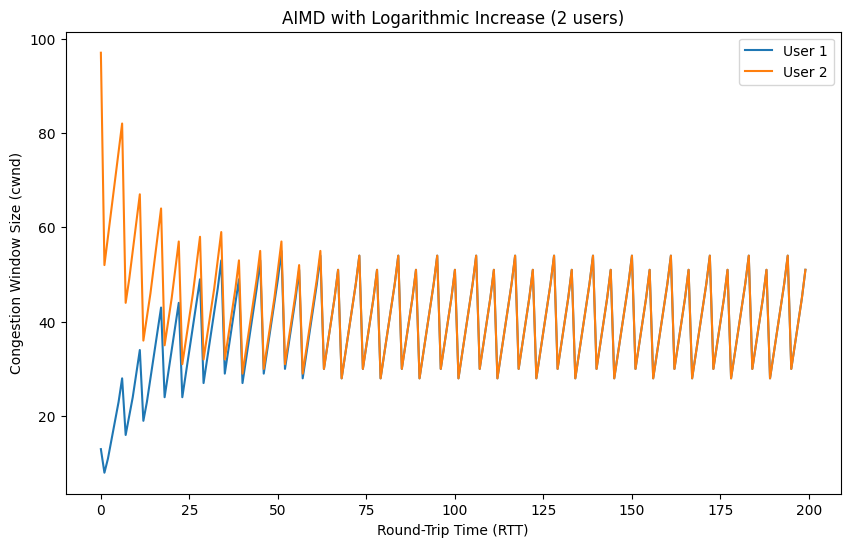

In [ ]:
import math

plot_title = "AIMD with Logarithmic Increase (2 users)"

# Experiment setup
num_users = 2  # Number of users in the simulation.
max_RTTs = 200  # Total number of round-trip times (RTTs) to simulate.
max_cwnd_sum = 100  # Maximum allowable sum of congestion windows across all users.
initial_cwnd = [10, 90] # Define the initial cwnd size for users.

# Alpha function with logarithmic increase, renamed as per request
def alpha_func(user, cwnd):
    """
    Calculates the logarithmic increase for the congestion window, ignoring the user parameter.

    Args:
        user: The index of the current user (unused in this function but included for compatibility).
        cwnd: Current congestion window size.

    Returns:
        The amount to increase the congestion window size, based on a logarithmic function.
    """
    BASE = 2 # Base 2 logarithms are taken so that the window size will always be >= 1
    # Prevent log(0) by ensuring cwnd is at least 1
    cwnd = max(cwnd, 1)
    # As partial window sizes are not allowed, we take the rounded integer value of the window size
    return round(math.log(1 + cwnd, BASE))

# Constant multiplicative decrease function
def beta_func(cwnd):
    """
    Defines the multiplicative decrease factor.

    Args:
        cwnd: Current congestion window size (unused in this function but included for consistency).

    Returns:
        The factor by which the cwnd is to be multiplied during the multiplicative decrease phase.
    """
    return 0.5  # Constant factor for multiplicative decrease.

# The simulate function is called without initial_cwnd, assuming it will generate initial cwnd values randomly.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

We note that the network converges after the 63rd RTT suggesting fewer number of RTTs required for convergence as compared to the traditional AIMD using the parameters alpha = 1 and beta = 0.5 (TCP Reno). Also, it is noted that the multiplicative decrease step occurs more often compared to TCP Reno, as this logarithmic increase function allows for a higher rate of increase in cwnd size for both users.

Initial cwnd for user 0: 38.0
Initial cwnd for user 1: 39.0
Initial cwnd for user 2: 23.0
Initial cwnd for user 3: 6.0
Initial cwnd for user 4: 35.0
Initial cwnd for user 5: 39.0
Initial cwnd for user 6: 41.0
Initial cwnd for user 7: 6.0
Initial cwnd for user 8: 45.0
Initial cwnd for user 9: 50.0
Initial cwnd for user 10: 36.0
Initial cwnd for user 11: 40.0
Initial cwnd for user 12: 50.0
Initial cwnd for user 13: 34.0
Initial cwnd for user 14: 35.0
Initial cwnd for user 15: 29.0
Initial cwnd for user 16: 15.0
Initial cwnd for user 17: 48.0
Initial cwnd for user 18: 44.0
Initial cwnd for user 19: 12.0
Multiplicative Decrease at: 4
Multiplicative Decrease at: 9
Multiplicative Decrease at: 15
Multiplicative Decrease at: 20
Multiplicative Decrease at: 26
Multiplicative Decrease at: 31
Multiplicative Decrease at: 37
Multiplicative Decrease at: 42
Multiplicative Decrease at: 48
Multiplicative Decrease at: 53
Multiplicative Decrease at: 59
Multiplicative Decrease at: 64
Multiplicative Decreas

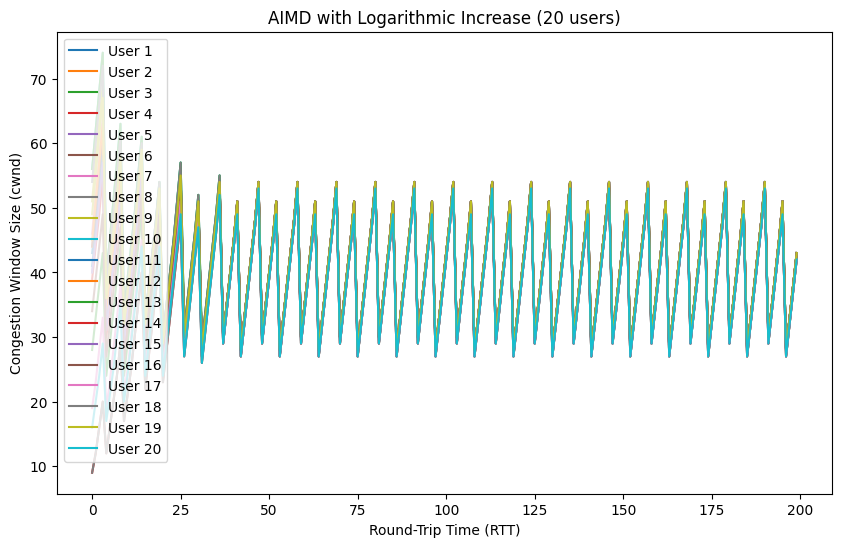

In [ ]:
plot_title = "AIMD with Logarithmic Increase (20 users)"

# Experiment setup
num_users = 20  # Number of users in the simulation.
max_RTTs = 200  # Total number of round-trip times (RTTs) to simulate.
max_cwnd_sum = 1000  # Maximum allowable sum of congestion windows across all users.
# initial_cwnd = [10, 90] # Define the initial cwnd size for users.
initial_cwnd = np.random.rand(20)
initial_cwnd *= max_cwnd_sum // num_users
initial_cwnd = np.round(initial_cwnd)

# Alpha function with logarithmic increase, renamed as per request
def alpha_func(user, cwnd):
    """
    Calculates the logarithmic increase for the congestion window, ignoring the user parameter.

    Args:
        user: The index of the current user (unused in this function but included for compatibility).
        cwnd: Current congestion window size.

    Returns:
        The amount to increase the congestion window size, based on a logarithmic function.
    """
    BASE = 2 # Base 2 logarithms are taken so that the window size will always be >= 1
    # Prevent log(0) by ensuring cwnd is at least 1
    cwnd = max(cwnd, 1)
    # As partial window sizes are not allowed, we take the rounded integer value of the window size
    return round(math.log(1 + cwnd, BASE))

# Constant multiplicative decrease function
def beta_func(cwnd):
    """
    Defines the multiplicative decrease factor.

    Args:
        cwnd: Current congestion window size (unused in this function but included for consistency).

    Returns:
        The factor by which the cwnd is to be multiplied during the multiplicative decrease phase.
    """
    return 0.5  # Constant factor for multiplicative decrease.

# The simulate function is called without initial_cwnd, assuming it will generate initial cwnd values randomly.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

## Experiment 2: AIMD with Exponential Increase

In this experiment, we test the increase in cwnd size using an exponential function with power < 1 so that the increase in cwnd size tapers off as cwnd size becomes larger. The increase in cwnd size will exhibit sublinear behaviour which leads to a more gradual approach of the maximum bandwidth limits of the network and potentially leading to less abrupt congestion.

Initial cwnd for user 0: 10.0
Initial cwnd for user 1: 90.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 6
Multiplicative Decrease at: 11
Multiplicative Decrease at: 16
Multiplicative Decrease at: 21
Multiplicative Decrease at: 26
Multiplicative Decrease at: 30
Multiplicative Decrease at: 35
Multiplicative Decrease at: 40
Multiplicative Decrease at: 45
Multiplicative Decrease at: 50
Multiplicative Decrease at: 55
Multiplicative Decrease at: 60
Multiplicative Decrease at: 65
Multiplicative Decrease at: 70
Multiplicative Decrease at: 75
Multiplicative Decrease at: 80
Multiplicative Decrease at: 85
Multiplicative Decrease at: 90
Multiplicative Decrease at: 95
Multiplicative Decrease at: 100
Multiplicative Decrease at: 105
Multiplicative Decrease at: 110
Multiplicative Decrease at: 115
Multiplicative Decrease at: 120
Multiplicative Decrease at: 125
Multiplicative Decrease at: 130
Multiplicative Decrease at: 135
Multiplicative Decrease at: 140
Multiplicative Decrease at: 145
Mu

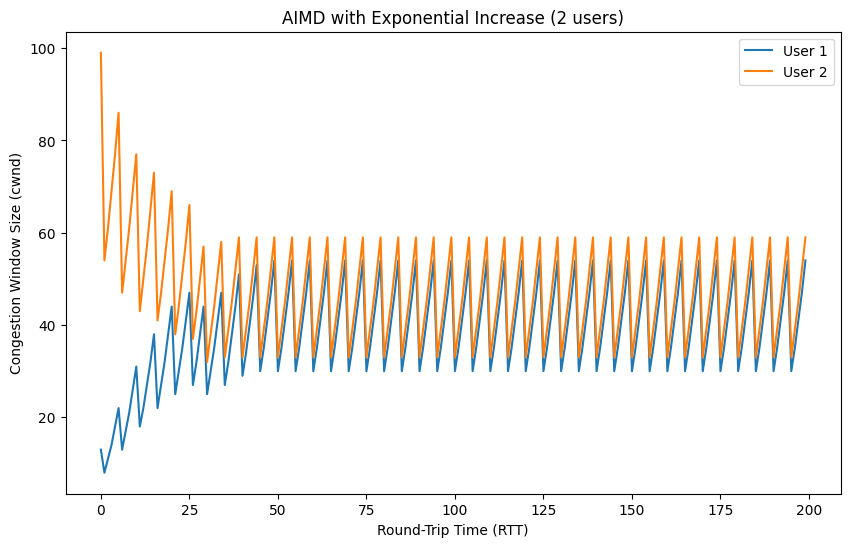

In [ ]:
plot_title = "AIMD with Exponential Increase (2 users)"

# Experiment setup
num_users = 2  # Number of users in the simulation.
max_RTTs = 200  # Total number of round-trip times (RTTs) to simulate.
max_cwnd_sum = 100  # Maximum allowable sum of congestion windows across all users.
initial_cwnd = [10, 90] # Define the initial cwnd size for users.

def alpha_func(user, cwnd):
    """
    Calculates the increase for the congestion window based on cwnd^power, where power < 1,
    resulting in a growth rate that decreases as cwnd increases.

    Args:
        user: The index of the current user (unused in this function but included for compatibility).
        cwnd: Current congestion window size.

    Returns:
        The amount to increase the congestion window size, based on cwnd raised to a sub-linear power.
    """
    POWER = 0.5  # Sub-linear growth rate (power < 1)
    # Ensure cwnd is at least 1 to maintain a minimum growth rate
    cwnd = max(cwnd, 1)
    # Calculate the increase as cwnd^POWER and round it to the nearest integer
    increase = round(cwnd ** POWER)
    # Ensure at least a minimum increase of 1 to maintain AIMD properties
    return max(1, increase)

# Constant multiplicative decrease function
def beta_func(cwnd):
    """
    Defines the multiplicative decrease factor.

    Args:
        cwnd: Current congestion window size (unused in this function but included for consistency).

    Returns:
        The factor by which the cwnd is to be multiplied during the multiplicative decrease phase.
    """
    return 0.5  # Constant factor for multiplicative decrease.

# The simulate function is called without initial_cwnd, assuming it will generate initial cwnd values randomly.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

Interestingly, the network doesn't seem to converge fairly to an equal distribution of network throughput, as implied by the different cwnd size range between the 2 users upon convergence at the 45th RTT. There is a slight difference in cwnd size between the two users which implies different network bandwith allocation. The convergence of the two flows takes place at an earlier RTT compared to that of the logarithmic function and the traditional AIMD, suggesting a faster way of reaching convergence in the network.

Initial cwnd for user 0: 29.0
Initial cwnd for user 1: 47.0
Initial cwnd for user 2: 28.0
Initial cwnd for user 3: 42.0
Initial cwnd for user 4: 16.0
Initial cwnd for user 5: 14.0
Initial cwnd for user 6: 3.0
Initial cwnd for user 7: 48.0
Initial cwnd for user 8: 33.0
Initial cwnd for user 9: 21.0
Initial cwnd for user 10: 19.0
Initial cwnd for user 11: 31.0
Initial cwnd for user 12: 20.0
Initial cwnd for user 13: 14.0
Initial cwnd for user 14: 38.0
Initial cwnd for user 15: 27.0
Initial cwnd for user 16: 1.0
Initial cwnd for user 17: 2.0
Initial cwnd for user 18: 43.0
Initial cwnd for user 19: 8.0
Multiplicative Decrease at: 5
Multiplicative Decrease at: 10
Multiplicative Decrease at: 15
Multiplicative Decrease at: 20
Multiplicative Decrease at: 25
Multiplicative Decrease at: 30
Multiplicative Decrease at: 35
Multiplicative Decrease at: 40
Multiplicative Decrease at: 45
Multiplicative Decrease at: 50
Multiplicative Decrease at: 55
Multiplicative Decrease at: 60
Multiplicative Decrease

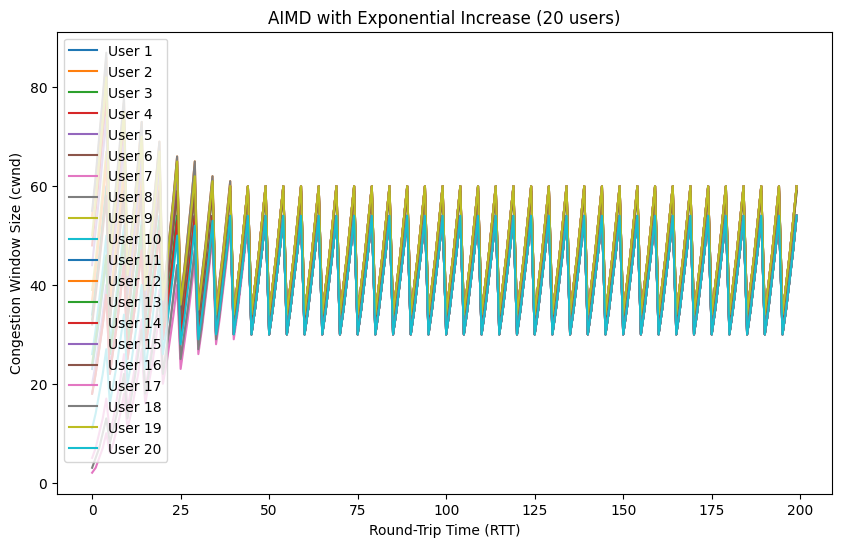

In [ ]:
plot_title = "AIMD with Exponential Increase (20 users)"

# Experiment setup
num_users = 20  # Number of users in the simulation.
max_RTTs = 200  # Total number of round-trip times (RTTs) to simulate.
max_cwnd_sum = 1000  # Maximum allowable sum of congestion windows across all users.
# initial_cwnd = [10, 90] # Define the initial cwnd size for users.
initial_cwnd = np.random.rand(20)
initial_cwnd *= max_cwnd_sum // num_users
initial_cwnd = np.round(initial_cwnd)

def alpha_func(user, cwnd):
    """
    Calculates the increase for the congestion window based on cwnd^power, where power < 1,
    resulting in a growth rate that decreases as cwnd increases.

    Args:
        user: The index of the current user (unused in this function but included for compatibility).
        cwnd: Current congestion window size.

    Returns:
        The amount to increase the congestion window size, based on cwnd raised to a sub-linear power.
    """
    POWER = 0.5  # Sub-linear growth rate (power < 1)
    # Ensure cwnd is at least 1 to maintain a minimum growth rate
    cwnd = max(cwnd, 1)
    # Calculate the increase as cwnd^POWER and round it to the nearest integer
    increase = round(cwnd ** POWER)
    # Ensure at least a minimum increase of 1 to maintain AIMD properties
    return max(1, increase)

# Constant multiplicative decrease function
def beta_func(cwnd):
    """
    Defines the multiplicative decrease factor.

    Args:
        cwnd: Current congestion window size (unused in this function but included for consistency).

    Returns:
        The factor by which the cwnd is to be multiplied during the multiplicative decrease phase.
    """
    return 0.5  # Constant factor for multiplicative decrease.

# The simulate function is called without initial_cwnd, assuming it will generate initial cwnd values randomly.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

With 20 users, the performance of the three AIMD algorithms are as follows: convergence at the 128th RTT with the traditional AIMD parameters, convergence at the 37th RTT with the logarithmic function, 40th RTT with the exponential function. Both nonlinear functions exhibited faster convergence compared to baseline AIMD. However, the number of RTTs required for both logarithmic and exponential functions to converge are similar with the logarithmic function edging out the exponential function, while also converging to a fair bandwidth distribution which the exponential function does not facilitate.

## Experiment 3: AIMD with Different Priority for Users

In this experiment, we differentiate user priorities by modifying the alpha function, which dictates the additive increase phase. Each user's alpha value is dependent on their index, introducing a dynamic where one user's cwnd grows faster than the other's, simulating a priority system. The beta function, responsible for the multiplicative decrease, remains constant across users, ensuring that congestion detection affects both users uniformly. For consistency, user 2 is the premium user tier and thus has a larger share of the network bandwidth, compared to user 1.

Initial cwnd for user 0: 10.0
Initial cwnd for user 1: 90.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 18
Multiplicative Decrease at: 36
Multiplicative Decrease at: 54
Multiplicative Decrease at: 71
Multiplicative Decrease at: 89
Multiplicative Decrease at: 107
Multiplicative Decrease at: 125
Multiplicative Decrease at: 143
Multiplicative Decrease at: 161
Multiplicative Decrease at: 179
Multiplicative Decrease at: 197
[[11.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
  11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
  14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
  16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 16.
  17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.

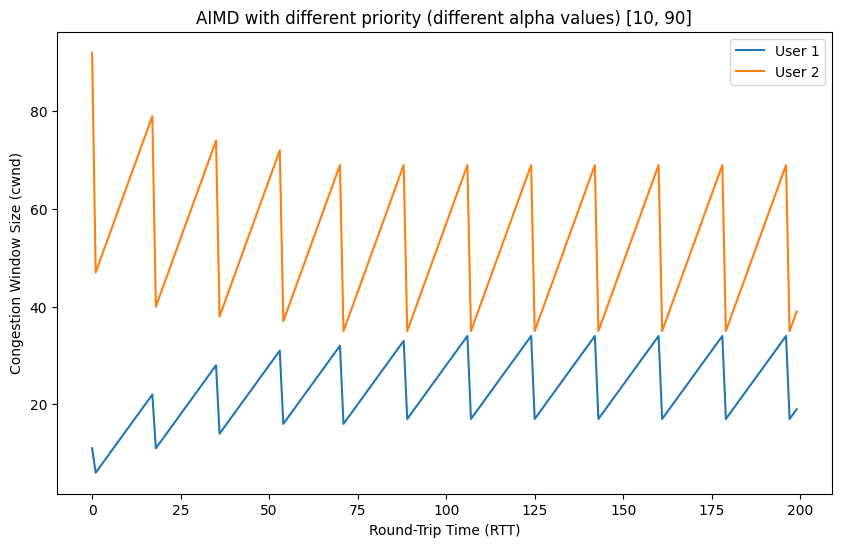

In [ ]:
plot_title = "AIMD with different priority (different alpha values) [10, 90]"

# Experiment setup
num_users = 2  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 100  # Define the maximum total sum of congestion window sizes across all users.
initial_cwnd = [10, 90] # Define the initial cwnd size for users.

# Define the alpha function, which determines the additive increase based on user priority.
def alpha_func(user, cwnd):
    """
    Args:
        user: The index of the current user.
        cwnd: The current congestion window size (not used in this function but included for consistency).

    Returns:
        The amount by which the user's cwnd should be increased in the additive increase phase.
    """
    return 1 + user  # The additive increase depends on the user index, simulating different priorities.

# Define the beta function, which specifies the multiplicative decrease factor.
def beta_func(cwnd):
    """
    Args:
        cwnd: The current congestion window size.

    Returns:
        The factor by which the cwnd should be multiplied in the multiplicative decrease phase.
    """
    return 0.5  # A constant multiplicative decrease factor for all users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

We note that the network converges after the 71st RTT to a distribution that corresponds to the index of the user, such that user 1 has higher additive increase and congestion window size than user 0. On a 2D axis, with user 1 on the vertical axis and user 0 on the horizontal axis, this can be represented as the equation `y = 2x`.

This tiered network could be useful in allocating higher network speeds to a paid tier of customers in the cloud computing network, compared to the free tier which would run on slower speeds.

Initial cwnd for user 0: 90.0
Initial cwnd for user 1: 10.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 18
Multiplicative Decrease at: 36
Multiplicative Decrease at: 54
Multiplicative Decrease at: 71
Multiplicative Decrease at: 89
Multiplicative Decrease at: 107
Multiplicative Decrease at: 124
Multiplicative Decrease at: 142
Multiplicative Decrease at: 160
Multiplicative Decrease at: 178
Multiplicative Decrease at: 196
[[91. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62.
  31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.
  24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41.
  21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 19.
  20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 18.
  19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 18.
  19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 17. 18.
  19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.

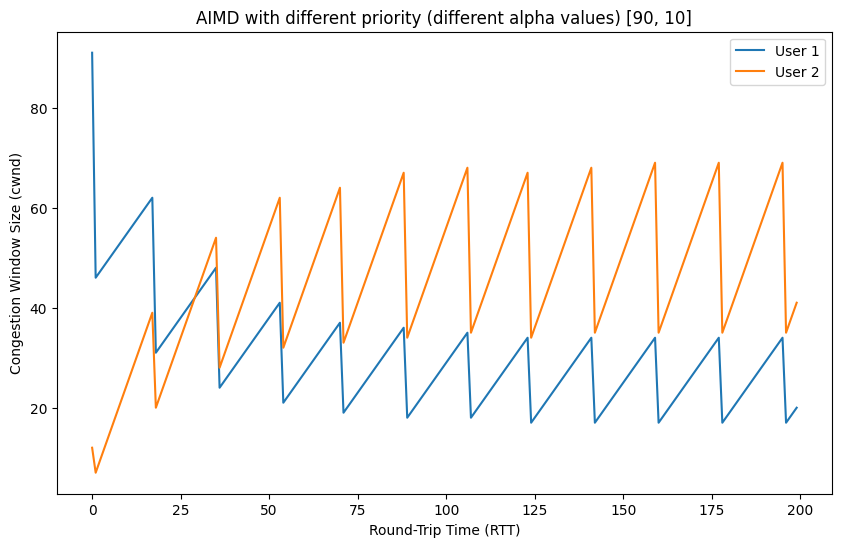

In [ ]:
plot_title = "AIMD with different priority (different alpha values) [90, 10]"

# Experiment setup
num_users = 2  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 100  # Define the maximum total sum of congestion window sizes across all users.
initial_cwnd = [90, 10] # Define the initial cwnd size for users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

When we reverse the order of the initial cwnd size, we note that convergence only occurs after 107th RTT for user 2 to consistently have larger cwnd size compared to user 1.

## Experiment 4: Combining Exponential and Logarithmic Functions

To achieve a similar behaviour as different user priorities, we can use different incremental functions for the different user tiers. This can result in serving different classes of users with different bandwidth speeds, but with faster network convergence. In here, two different user classes are sampled, with user 1 (index 0) following the logarithmic function for cwnd size addition and user 2 (index 1) following the exponential function for cwnd size addition.

Initial cwnd for user 0: 10.0
Initial cwnd for user 1: 90.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 6
Multiplicative Decrease at: 11
Multiplicative Decrease at: 16
Multiplicative Decrease at: 21
Multiplicative Decrease at: 26
Multiplicative Decrease at: 31
Multiplicative Decrease at: 36
Multiplicative Decrease at: 41
Multiplicative Decrease at: 46
Multiplicative Decrease at: 51
Multiplicative Decrease at: 56
Multiplicative Decrease at: 61
Multiplicative Decrease at: 66
Multiplicative Decrease at: 71
Multiplicative Decrease at: 76
Multiplicative Decrease at: 81
Multiplicative Decrease at: 86
Multiplicative Decrease at: 91
Multiplicative Decrease at: 96
Multiplicative Decrease at: 101
Multiplicative Decrease at: 106
Multiplicative Decrease at: 111
Multiplicative Decrease at: 116
Multiplicative Decrease at: 121
Multiplicative Decrease at: 126
Multiplicative Decrease at: 131
Multiplicative Decrease at: 136
Multiplicative Decrease at: 141
Multiplicative Decrease at: 146
Mu

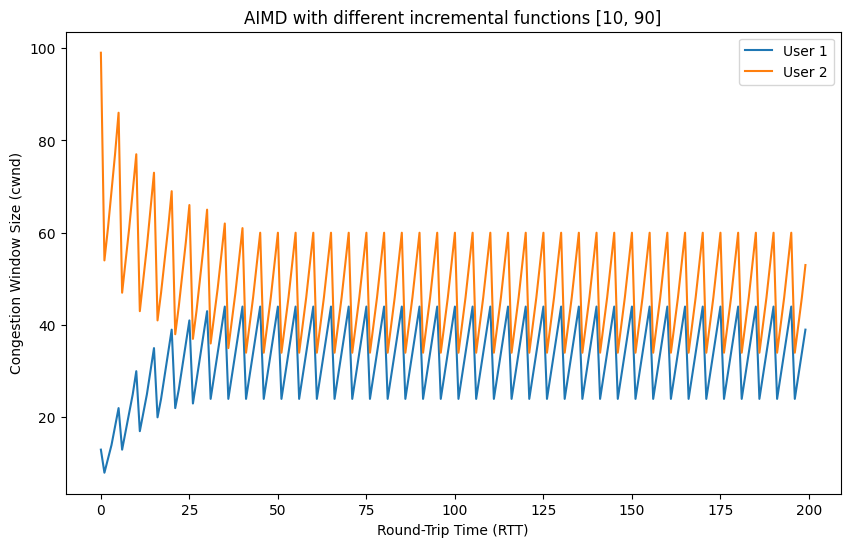

In [ ]:
plot_title = "AIMD with different incremental functions [10, 90]"

# Experiment setup
num_users = 2  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 100  # Define the maximum total sum of congestion window sizes across all users.
initial_cwnd = [10, 90] # Define the initial cwnd size for users.

def alpha_func(user, cwnd):
    """
    Adjusts the congestion window size (cwnd) using different strategies based on the user index.
    The zeroth user employs a logarithmic increase, while the first user uses an exponential increase.

    Args:
        user: The index of the current user, determining the increase strategy.
        cwnd: The current congestion window size.

    Returns:
        The amount to increase the cwnd, calculated using either a logarithmic or exponential function.
    """
    # Ensure cwnd is at least 1 to prevent math domain errors
    cwnd = max(cwnd, 1)

    if user == 0:  # Logarithmic increase for the zeroth user
        BASE = 2  # Base of the logarithm
        return max(1, round(math.log(cwnd, BASE)))
    elif user == 1:  # Exponential increase for the first user
        POWER = 0.5  # Power for exponential growth, less than 1 for sub-linear growth
        return max(1, round(cwnd ** POWER))


# Define the beta function, which specifies the multiplicative decrease factor.
def beta_func(cwnd):
    """
    Args:
        cwnd: The current congestion window size.

    Returns:
        The factor by which the cwnd should be multiplied in the multiplicative decrease phase.
    """
    return 0.5  # A constant multiplicative decrease factor for all users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

Here, we note that convergence is achieved at around the 36th RTT. At convergence, the exponential function is able to serve a larger cwnd size compared to the logarithmic function, and this indicates a larger increase in cwnd size in the additive step of the algorithm. We observe similar convergence behaviour when we reverse the order of the starting cwnd size for both user classes.

Initial cwnd for user 0: 90.0
Initial cwnd for user 1: 10.0
Multiplicative Decrease at: 1
Multiplicative Decrease at: 7
Multiplicative Decrease at: 13
Multiplicative Decrease at: 18
Multiplicative Decrease at: 23
Multiplicative Decrease at: 28
Multiplicative Decrease at: 33
Multiplicative Decrease at: 38
Multiplicative Decrease at: 44
Multiplicative Decrease at: 49
Multiplicative Decrease at: 54
Multiplicative Decrease at: 59
Multiplicative Decrease at: 64
Multiplicative Decrease at: 69
Multiplicative Decrease at: 74
Multiplicative Decrease at: 79
Multiplicative Decrease at: 84
Multiplicative Decrease at: 89
Multiplicative Decrease at: 94
Multiplicative Decrease at: 99
Multiplicative Decrease at: 104
Multiplicative Decrease at: 109
Multiplicative Decrease at: 114
Multiplicative Decrease at: 119
Multiplicative Decrease at: 124
Multiplicative Decrease at: 129
Multiplicative Decrease at: 134
Multiplicative Decrease at: 139
Multiplicative Decrease at: 144
Multiplicative Decrease at: 149
Mu

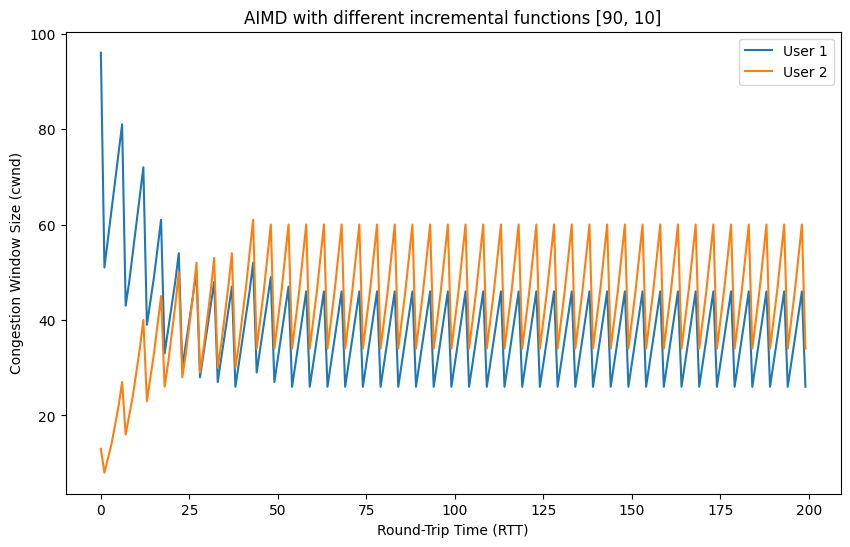

In [ ]:
plot_title = "AIMD with different incremental functions [90, 10]"

# Experiment setup
num_users = 2  # Define the number of users involved in the experiment.
max_RTTs = 200  # Specify the maximum number of RTTs to simulate.
max_cwnd_sum = 100  # Define the maximum total sum of congestion window sizes across all users.
initial_cwnd = [90, 10] # Define the initial cwnd size for users.

# Run the simulation with the specified parameters.
simulate(max_RTTs, num_users, initial_cwnd, max_cwnd_sum, alpha_func, beta_func, plot_title)

This time, convergence occurs at around the 54th RTT, representing more iterations required for user 2 with the exponential function to reach a consistently larger cwnd size than user 1 with the logarithmic function.